In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
logs_dir = "logs"
reward_files = [f for f in os.listdir(logs_dir) if f.startswith("test_rewards_") and f.endswith(".csv")]

if not reward_files:
    raise FileNotFoundError("Нет файлов логов наград в папке 'logs'")

latest_file = max(reward_files, key=lambda x: datetime.strptime(x.split('_')[2] + '_' + x.split('_')[3].split('.')[0], "%Y%m%d_%H%M%S"))
rewards_log_file = os.path.join(logs_dir, latest_file)

df = pd.read_csv(rewards_log_file)
print(f"Загружен файл: {rewards_log_file}")
print(f"Размер данных: {df.shape}")
df.head()

Загружен файл: logs\test_rewards_20250328_120448.csv
Размер данных: (9819, 14)


,Episode,Step,Agent,Total Reward,Fire Reward,Step Penalty,Crash Penalty,Out of Bounds Penalty,Obstacle Penalty,Wind Penalty,Wind Avoid Bonus,Stagnation Penalty,Close Penalty,Final Reward
0,1,1,0,-0.3,0,-0.001,0.0,0,0.0,0,0.0,0,0.0,0
1,1,1,1,-0.3,0,-0.001,0.0,0,0.0,0,0.0,0,0.0,0
2,1,1,2,-0.3,0,-0.001,0.0,0,0.0,0,0.0,0,0.0,0
3,1,2,0,-0.2,0,-0.001,0.0,0,0.0,0,0.0,0,0.0,0
4,1,2,1,-0.2,0,-0.001,0.0,0,0.0,0,0.0,0,0.0,0


In [4]:
# Список колонок с наградами и штрафами
reward_columns = ["Fire Reward", "Step Penalty", "Crash Penalty", "Out of Bounds Penalty",
                  "Obstacle Penalty", "Wind Penalty", "Wind Avoid Bonus", "Stagnation Penalty",
                  "Close Penalty", "Final Reward"]

# Подсчёт количества ненулевых значений для каждой награды по эпизодам
counts_by_episode = df.groupby("Episode")[reward_columns].apply(lambda x: (x != 0).sum())

# Подсчёт суммы каждой награды по эпизодам
sums_by_episode = df.groupby("Episode")[reward_columns].sum()

# Вывод результатов
print("\nКоличество ненулевых наград/штрафов по эпизодам:")
print(counts_by_episode)
print("\nСумма наград/штрафов по эпизодам:")
print(sums_by_episode)


Количество ненулевых наград/штрафов по эпизодам:
         Fire Reward  Step Penalty  Crash Penalty  Out of Bounds Penalty  \
Episode                                                                    
1                 15           522              0                      0   
2                  6          1164              0                      0   
3                 15           843              0                      0   
4                  6          1500              2                      0   
5                  6          1500              0                      0   
6                  6          1500              0                      0   
7                  9           291              0                      0   
8                  9           843              0                      0   
9                  3          1500              0                      0   
10                 9           156              0                      0   

         Obstacle Penalty  Wind Penal

In [5]:
# Среднее количество и сумма по всем эпизодам
mean_counts = counts_by_episode.mean()
mean_sums = sums_by_episode.mean()

# Создание DataFrame для визуализации
plot_data_counts = mean_counts.reset_index()
plot_data_counts.columns = ["Reward Type", "Mean Count"]

plot_data_sums = mean_sums.reset_index()
plot_data_sums.columns = ["Reward Type", "Mean Sum"]

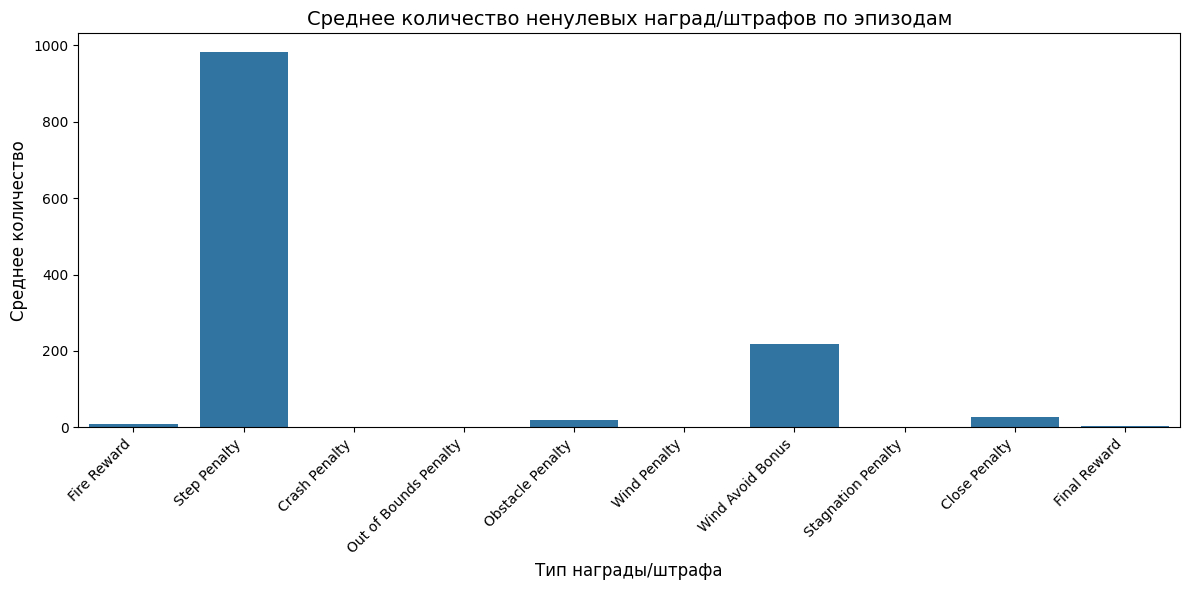

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data_counts, x="Reward Type", y="Mean Count")
plt.title("Среднее количество ненулевых наград/штрафов по эпизодам", fontsize=14)
plt.xlabel("Тип награды/штрафа", fontsize=12)
plt.ylabel("Среднее количество", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

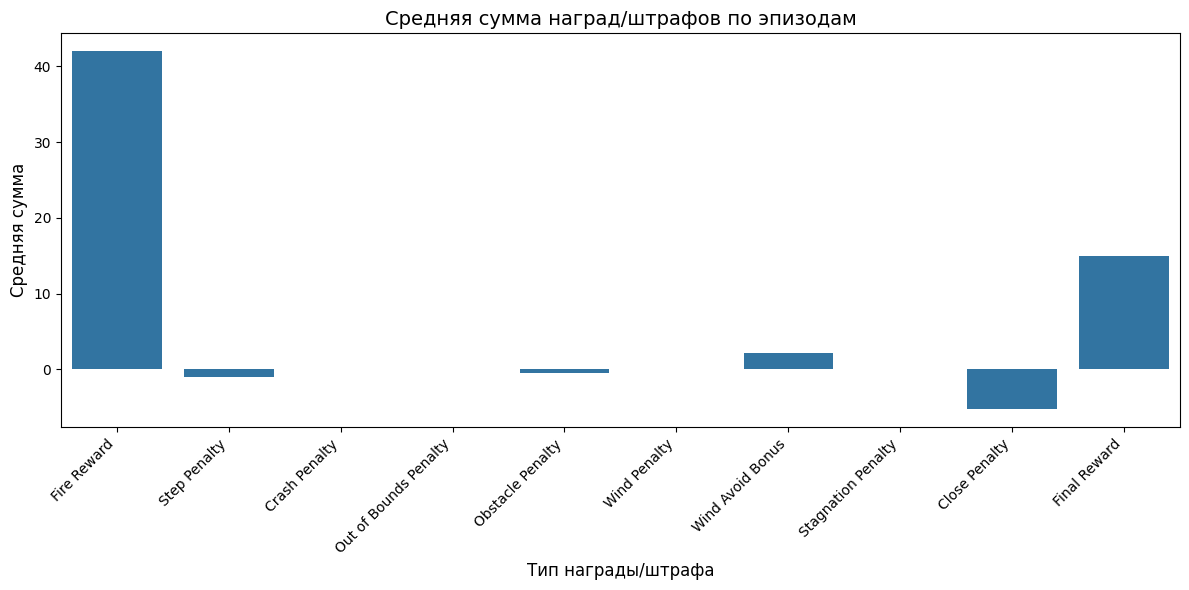

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data_sums, x="Reward Type", y="Mean Sum")
plt.title("Средняя сумма наград/штрафов по эпизодам", fontsize=14)
plt.xlabel("Тип награды/штрафа", fontsize=12)
plt.ylabel("Средняя сумма", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
# Общая статистика по эпизодам
episode_summary = df.groupby("Episode").agg({
    "Total Reward": "sum",
    "Step": "max",  # Максимальное количество шагов
    "Fire Reward": "sum",
    "Step Penalty": "sum",
    "Crash Penalty": "sum"
}).rename(columns={"Step": "Total Steps"})
print("\nСводка по эпизодам:")
print(episode_summary)

# Корреляция между наградами и общим результатом
correlation = df[reward_columns + ["Total Reward"]].corr()
print("\nКорреляция между наградами и общим вознаграждением:")
print(correlation["Total Reward"].sort_values(ascending=False))


Сводка по эпизодам:
         Total Reward  Total Steps  Fire Reward  Step Penalty  Crash Penalty
Episode                                                                     
1              110.46          174           75        -0.522            0.0
2               26.94          388           30        -1.164            0.0
3               53.64          281           75        -0.843            0.0
4                1.05          500           30        -1.500           -0.2
5                7.65          500           30        -1.500            0.0
6                4.20          500           30        -1.500            0.0
7               97.35           97           45        -0.291            0.0
8               65.28          281           45        -0.843            0.0
9               -8.13          500           15        -1.500            0.0
10             104.61           52           45        -0.156            0.0

Корреляция между наградами и общим вознаграждением:
To

<Figure size 1200x600 with 0 Axes>

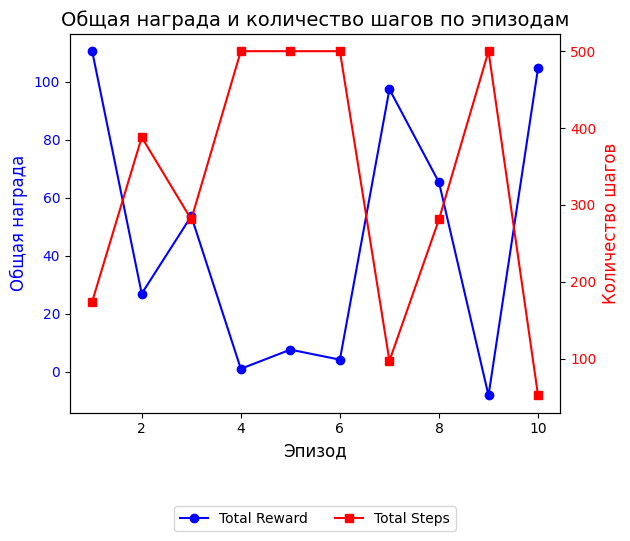

In [10]:
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()

ax1.plot(episode_summary.index, episode_summary["Total Reward"], color='b', marker='o', label='Total Reward')
ax1.set_xlabel('Эпизод', fontsize=12)
ax1.set_ylabel('Общая награда', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(episode_summary.index, episode_summary["Total Steps"], color='r', marker='s', label='Total Steps')
ax2.set_ylabel('Количество шагов', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Общая награда и количество шагов по эпизодам', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

<Figure size 1200x600 with 0 Axes>

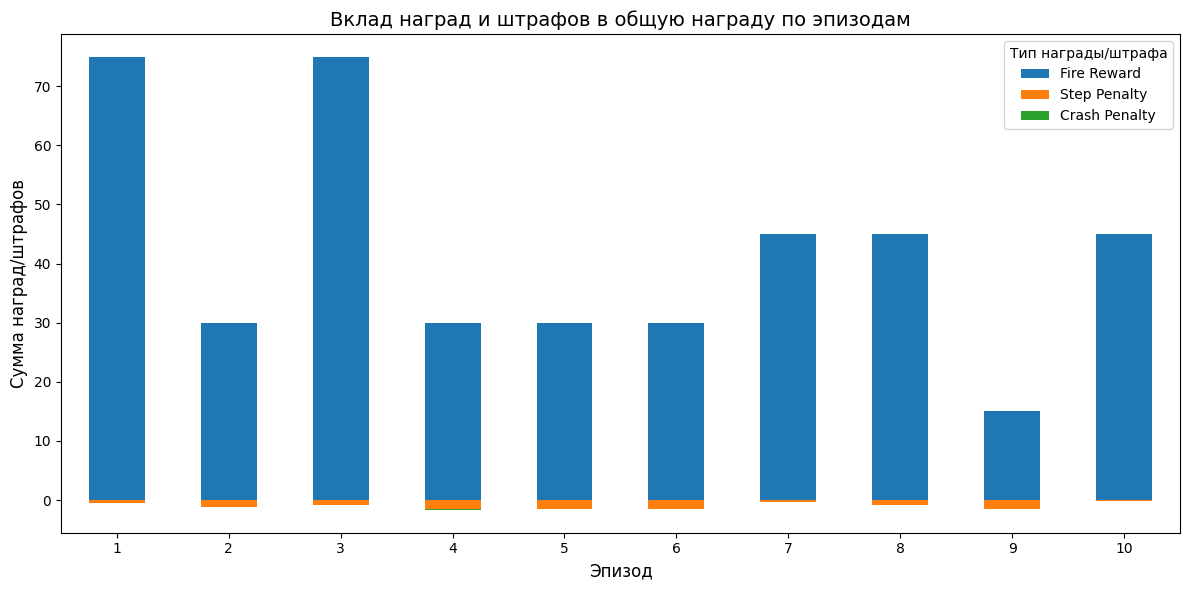

In [11]:
plt.figure(figsize=(12, 6))
episode_summary[["Fire Reward", "Step Penalty", "Crash Penalty"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Вклад наград и штрафов в общую награду по эпизодам', fontsize=14)
plt.xlabel('Эпизод', fontsize=12)
plt.ylabel('Сумма наград/штрафов', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Тип награды/штрафа')
plt.tight_layout()
plt.show()

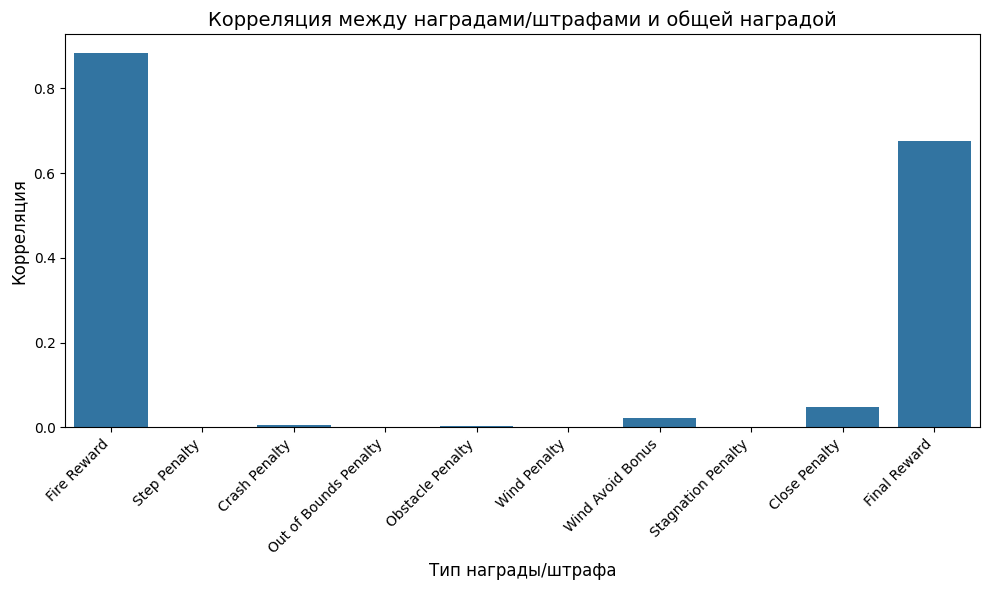

In [12]:
plt.figure(figsize=(10, 6))
correlation_data = correlation["Total Reward"].drop("Total Reward")
sns.barplot(x=correlation_data.index, y=correlation_data.values)
plt.title('Корреляция между наградами/штрафами и общей наградой', fontsize=14)
plt.xlabel('Тип награды/штрафа', fontsize=12)
plt.ylabel('Корреляция', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()